In [7]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Qt4Agg')
from mpl_toolkits.mplot3d import Axes3D
plt.ion()
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn
%matplotlib qt
import pandas as pd

In [9]:
algorithm = 'RTAA'
max_num_of_move_perexpand = 10000
N = 3000
eps = 10
# algorithm = 'Vis-graph'
# algorithm = 'RRT'
# algorithm = 'BiRRT'
# algorithm = 'nRRT'
pg = 0.05  # prob goal for RRT
num_of_tree = 10  # number of trees for nRRT
RRT_connect = True
reconnect = True  # reconnect the RRT graph after building
inline = True
savefig = True
verbose = False



# maps = ['test_single_cube', 'test_flappy_bird', 'test_monza', 'test_window', 'test_tower', 'test_room', 'test_maze']
# for map in maps[6:]:
#     fig_path = './result_old/' + algorithm + '/' + str([N, eps, max_num_of_move_perexpand]) + '/' + map + '/'
#     fig = pickle.load(open(fig_path + 'path_fig.pickle', 'rb'))
#     # data = [[algorithm, max_num_of_move_perexpand, N, eps, pg, num_of_tree, RRT_connect, reconnect, inline],
#     #         [success, numofmoves, distance, total_time]]
#     data = pickle.load(open(fig_path + 'data.pickle', 'rb'))
#     # print('algorithm', data)
#     print(fig.axes[0].lines[0].get_data())
#     fig.show()
#     plt.pause(1000)



In [11]:
base = './result'
maps = ['test_single_cube', 'test_flappy_bird', 'test_monza', 'test_window', 'test_tower', 'test_room', 'test_maze']
data_all = {}
data_all['algorithm'] = []
data_all['max_num_of_move_perexpand'] = []
data_all['N'] = []
data_all['eps'] = []
data_all['pg'] = []
data_all['num_of_tree'] = []
data_all['RRT_connect'] = []
data_all['reconnect'] = []
data_all['inline'] = []
data_all['route'] = []
data_all['success'] = []
data_all['numofmoves'] = []
data_all['distance'] = []
data_all['total_time'] = []
data_all['fig_path'] = []
data_all['map'] = []
data_all['norm'] = []
for algorithm in os.listdir('./result'):
    path = base + './'+ algorithm +'/'
    plist = [os.listdir(path)[i].lstrip('[').rstrip(']').split(',') for i in range(len(os.listdir(path)))]
    for i in range(len(plist)):
        tmp = plist[i][-1].strip().strip("'")
        norm = tmp
        fig_path_b= path + os.listdir(path)[i] + '/'
        for mapp in maps:
            fig_path = fig_path_b + mapp +'/'
            if(os.path.exists(fig_path)):
                data = pickle.load(open(fig_path + 'data.pickle', 'rb'))
                route = pickle.load(open(fig_path + 'route.pickle', 'rb'))
                [[algorithm, max_num_of_move_perexpand, N, eps, pg, num_of_tree, RRT_connect, reconnect, inline],[success, numofmoves, distance, total_time]] = data
                data_all['algorithm'].append(algorithm)
                data_all['max_num_of_move_perexpand'].append(max_num_of_move_perexpand)
                data_all['N'].append(N)
                data_all['eps'].append(eps)
                data_all['pg'].append(pg)
                data_all['num_of_tree'].append(num_of_tree)
                data_all['RRT_connect'].append(RRT_connect)
                data_all['reconnect'].append(reconnect)
                data_all['inline'].append(inline)
                data_all['route'].append(route)
                data_all['success'].append(success)
                data_all['numofmoves'].append(numofmoves)
                data_all['distance'].append(distance)
                data_all['total_time'].append( total_time)
                data_all['fig_path'].append(fig_path)
                data_all['map'].append(mapp)
                data_all['norm'].append(norm)

            else:
                print(fig_path, 'not found!!!!!')
            

./result./RRT/[0, 'abs']/test_monza/ not found!!!!!
./result./RRT/[0, 'abs']/test_maze/ not found!!!!!
./result./RRT/[0, 'l2']/test_monza/ not found!!!!!
./result./RRT/[0, 'l2']/test_maze/ not found!!!!!
./result./RRT/[0.01, 'abs']/test_monza/ not found!!!!!
./result./RRT/[0.01, 'abs']/test_maze/ not found!!!!!
./result./RRT/[0.01, 'l2']/test_monza/ not found!!!!!
./result./RRT/[0.01, 'l2']/test_maze/ not found!!!!!
./result./RRT/[0.05, 'abs']/test_monza/ not found!!!!!
./result./RRT/[0.05, 'abs']/test_maze/ not found!!!!!
./result./RRT/[0.05, 'l2']/test_monza/ not found!!!!!
./result./RRT/[0.05, 'l2']/test_maze/ not found!!!!!
./result./RRT/[0.1, 'abs']/test_monza/ not found!!!!!
./result./RRT/[0.1, 'abs']/test_maze/ not found!!!!!
./result./RRT/[0.1, 'l2']/test_monza/ not found!!!!!
./result./RRT/[0.1, 'l2']/test_maze/ not found!!!!!
./result./RRT/[0.2, 'abs']/test_monza/ not found!!!!!
./result./RRT/[0.2, 'abs']/test_maze/ not found!!!!!
./result./RRT/[0.2, 'l2']/test_monza/ not fou

In [13]:
pd_data = pd.DataFrame(data_all)
pd_data =pd_data.drop([65,121])
pd_data[pd_data['algorithm'] == 'nRRT'][pd_data['map'] == 'test_monza'][pd_data['reconnect'] == True]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,N,RRT_connect,algorithm,distance,eps,fig_path,inline,map,max_num_of_move_perexpand,norm,num_of_tree,numofmoves,pg,reconnect,route,success,total_time
58,300,True,nRRT,87.881568,10,"./result./nRRT/[20, True, True, 'abs']/test_mo...",True,test_monza,10000,abs,20,152,0.05,True,"[[0.5, 1.0, 4.9], [0.5, 1.0, 4.9], [0.5, 1.0, ...",True,45.631137
114,300,True,nRRT,85.860526,10,"./result./nRRT/[8, True, True, 'abs']/test_monza/",True,test_monza,10000,abs,8,117,0.05,True,"[[0.5, 1.0, 4.9], [0.5, 1.0, 4.9], [0.5, 1.0, ...",True,21.911462


In [30]:
grouped = pd_data.groupby(by = ['algorithm','map'])

In [31]:
index = np.int32(grouped.idxmin()['distance'].values)

In [32]:
def draw_map(boundary, blocks, start, goal):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    hb = draw_block_list(ax, blocks)
    hs = ax.plot(start[0:1], start[1:2], start[2:], 'ro', markersize=7, markeredgecolor='k')
    hg = ax.plot(goal[0:1], goal[1:2], goal[2:], 'go', markersize=7, markeredgecolor='k')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(boundary[0, 0], boundary[0, 3])
    ax.set_ylim(boundary[0, 1], boundary[0, 4])
    ax.set_zlim(boundary[0, 2], boundary[0, 5])
    return fig, ax, hb, hs, hg

def load_map(fname):
    mapdata = np.loadtxt(fname, dtype={'names': ('type', 'xmin', 'ymin', 'zmin', 'xmax', 'ymax', 'zmax', 'r', 'g', 'b'), \
                                       'formats': ('S8', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f')})
    blockIdx = mapdata['type'] == b'block'
    boundary = mapdata[~blockIdx][['xmin', 'ymin', 'zmin', 'xmax', 'ymax', 'zmax', 'r', 'g', 'b']].view(('<f4', 9))
    blocks = mapdata[blockIdx][['xmin', 'ymin', 'zmin', 'xmax', 'ymax', 'zmax', 'r', 'g', 'b']].view(('<f4', 9))
    return boundary, blocks

def draw_block_list(ax, blocks):
    v = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]],
                 dtype='float')
    f = np.array([[0, 1, 5, 4], [1, 2, 6, 5], [2, 3, 7, 6], [3, 0, 4, 7], [0, 1, 2, 3], [4, 5, 6, 7]])
    clr = blocks[:, 6:] / 255
    n = blocks.shape[0]
    d = blocks[:, 3:6] - blocks[:, :3]
    vl = np.zeros((8 * n, 3))
    fl = np.zeros((6 * n, 4), dtype='int64')
    fcl = np.zeros((6 * n, 3))
    for k in range(n):
        vl[k * 8:(k + 1) * 8, :] = v * d[k] + blocks[k, :3]
        fl[k * 6:(k + 1) * 6, :] = f + k * 8
        fcl[k * 6:(k + 1) * 6, :] = clr[k, :]
    
    if type(ax) is Poly3DCollection:
        ax.set_verts(vl[fl])
    else:
        pc = Poly3DCollection(vl[fl], alpha=0.25, linewidths=1, edgecolors='k')
        pc.set_facecolor(fcl)
        h = ax.add_collection3d(pc)
        return h

In [84]:
compare_data_flappy_bird = {}
compare_data_maze = {}
for i in range(index.shape[0]): #index.shape[0]
    best_data = pd_data.loc[index[i]]
    algorithm = best_data['algorithm']
#     print(best_data)
    map_path = './maps/'+ best_data['map'][5:]+'.txt'
    if  best_data['map'][5:] == 'maze':
        start = np.array([0.0, 0.0, 1.0])
        goal = np.array([12.0, 12.0, 5.0])
        angle = (85,-85)
        compare_data_maze[algorithm] = [best_data['distance'],best_data['total_time']]
    if  best_data['map'][5:] == 'single_cube':
        start = np.array([2.3, 2.3, 1.3])
        goal = np.array([7.0, 7.0, 6.0])
        angle = (45,-45)
    if best_data['map'][5:] == 'window':
        start = np.array([0.2, -4.9, 0.2])
        goal = np.array([6.0, 18.0, 3.0])
        angle = (45,-20)
    if best_data['map'][5:] == 'monza':
        start = np.array([0.5, 1.0, 4.9])
        goal = np.array([3.8, 1.0, 0.1])
        angle = (85,-85)
    if best_data['map'][5:] == 'tower':
        start = np.array([2.5, 4.0, 0.5])
        goal = np.array([4.0, 2.5, 19.5])
        angle = (2,-45)
    if best_data['map'][5:] == 'flappy_bird':
        start = np.array([0.5, 2.5, 5.5])
        goal = np.array([19.0, 2.5, 5.5])
        angle = (45,-87)
        compare_data_flappy_bird[algorithm] = [best_data['distance'],best_data['total_time']]
    if best_data['map'][5:] == 'room':
        start = np.array([1.0, 5.0, 1.5])
        goal = np.array([9.0, 7.0, 1.5])
        angle = (75,-110)
#         
    if algorithm == 'RTAA':
        
        hyper = ['map','N', 'eps']
    if algorithm == 'Vis-graph':
        hyper = ['map','eps']
    if algorithm == 'RRT':
        print(best_data)
        hyper = ['map','pg']
    if algorithm == 'BiRRT':
        hyper = ['map','RRT_connect']
    if algorithm == 'nRRT':
        hyper = ['map','num_of_tree','RRT_connect','reconnect']
    print(map_path)
#     boundary, blocks = load_map(map_path)
#     fig, ax, hb, hs, hg = draw_map(boundary, blocks, start, goal)
#     route = best_data['route']
#     for pos in route:
#         ax.plot(pos[0:1], pos[1:2], pos[2:], 'ro', markersize=3, markeredgecolor='r')
#     fig.canvas.flush_events()
#     plt.title(algorithm + str([name + ':'+str(best_data[name]) for name in hyper]) + '\n' + best_data['norm'] + ',distance: %.1f, time: %.1f, nummove %d' % (best_data['distance'], best_data['total_time'],best_data['numofmoves']))
#     ax.view_init(*angle)
#     plt.show()
#     plt.savefig('./3d_plot_num/'+str(i)+'.png')
#     plt.close()

./maps/flappy_bird.txt
./maps/maze.txt
./maps/monza.txt
./maps/room.txt
./maps/single_cube.txt
./maps/tower.txt
./maps/window.txt
N                                                                           30
RRT_connect                                                               True
algorithm                                                                  RRT
distance                                                               37.4395
eps                                                                          1
fig_path                             ./result./RRT/[0, 'l2']/test_flappy_bird/
inline                                                                    True
map                                                           test_flappy_bird
max_num_of_move_perexpand                                                10000
norm                                                                        l2
num_of_tree                                                                 10
n

In [95]:

plt.figure()
pd.DataFrame(compare_data_flappy_bird).drop('RRT',axis = 1).join(pd.DataFrame({'RRT':[37.4395,2.374]})).loc[0].plot(kind = 'bar')
plt.title('flappy bird distance vs methods')
plt.savefig('./compare/flappy_dist.png')
plt.figure()
pd.DataFrame(compare_data_flappy_bird).drop('RRT',axis = 1).join(pd.DataFrame({'RRT':[37.4395,2.374]})).loc[1].plot(kind = 'bar')
plt.title('flappy bird time vs methods')
plt.savefig('./compare/flappy_time.png')
plt.figure()
pd.DataFrame(compare_data_maze).append({'RRT':[0,0]},ignore_index=True).loc[0].plot(kind = 'bar')
plt.title('maze distance vs methods')
plt.savefig('./compare/maze_dist.png')
plt.figure()
pd.DataFrame(compare_data_maze).append({'RRT':[0,0]},ignore_index=True).loc[1].plot(kind = 'bar')
plt.title('maze time vs methods')
plt.savefig('./compare/maze_time.png')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [82]:
pd.DataFrame(compare_data_flappy_bird).loc[0]

BiRRT        44.470306
RRT          37.439475
RTAA         26.213203
Vis-graph    25.276950
nRRT         35.034124
Name: 0, dtype: float64

In [83]:
pd_RTAA = pd_data[pd_data['algorithm'] == 'RTAA']
pd_RTAA 

,N,RRT_connect,algorithm,distance,eps,fig_path,inline,map,max_num_of_move_perexpand,norm,num_of_tree,numofmoves,pg,reconnect,route,success,total_time
176,1000,True,RTAA,8.082904,1,"./result./RTAA/[1000, 1, 10000, 'abs']/test_si...",True,test_single_cube,10000,abs,10,14,0.05,True,"[[2.6333333333333333, 2.6333333333333333, 1.63...",True,0.049553
177,1000,True,RTAA,31.582305,1,"./result./RTAA/[1000, 1, 10000, 'abs']/test_fl...",True,test_flappy_bird,10000,abs,10,97,0.05,True,"[[0.5, 2.5, 5.5], [0.5, 2.5, 5.5], [0.5, 2.5, ...",True,42.483809
178,1000,True,RTAA,311.362819,1,"./result./RTAA/[1000, 1, 10000, 'abs']/test_mo...",True,test_monza,10000,abs,10,925,0.05,True,"[[0.5, 1.0, 4.9], [0.5, 1.0, 4.9], [0.5, 1.333...",True,223.841704
179,1000,True,RTAA,26.869636,1,"./result./RTAA/[1000, 1, 10000, 'abs']/test_wi...",True,test_window,10000,abs,10,72,0.05,True,"[[0.2, -4.9, 0.2], [0.2, -4.9, 0.2], [0.2, -4....",True,8.371530
180,1000,True,RTAA,33.215470,1,"./result./RTAA/[1000, 1, 10000, 'abs']/test_to...",True,test_tower,10000,abs,10,131,0.05,True,"[[2.5, 4.0, 0.5], [2.5, 4.0, 0.5], [2.5, 4.0, ...",True,94.749574
181,1000,True,RTAA,12.128259,1,"./result./RTAA/[1000, 1, 10000, 'abs']/test_room/",True,test_room,10000,abs,10,36,0.05,True,"[[1.0, 5.0, 1.5], [1.0, 5.0, 1.5], [1.0, 5.0, ...",True,10.384966
182,1000,True,RTAA,8.082904,1,"./result./RTAA/[1000, 1, 10000, 'l2']/test_sin...",True,test_single_cube,10000,l2,10,14,0.05,True,"[[2.6333333333333333, 2.6333333333333333, 1.63...",True,0.049549
183,1000,True,RTAA,37.240292,1,"./result./RTAA/[1000, 1, 10000, 'l2']/test_fla...",True,test_flappy_bird,10000,l2,10,118,0.05,True,"[[0.5, 2.5, 5.5], [0.5, 2.5, 5.5], [0.5, 2.5, ...",True,62.603138
184,1000,True,RTAA,233.790569,1,"./result./RTAA/[1000, 1, 10000, 'l2']/test_monza/",True,test_monza,10000,l2,10,701,0.05,True,"[[0.5, 1.0, 4.9], [0.5, 1.0, 4.9], [0.5, 1.333...",True,183.394737
185,1000,True,RTAA,26.381602,1,"./result./RTAA/[1000, 1, 10000, 'l2']/test_win...",True,test_window,10000,l2,10,87,0.05,True,"[[0.2, -4.9, 0.2], [0.2, -4.9, 0.2], [0.2, -4....",True,34.809038


In [196]:
pd_tmp = pd_RTAA[(pd_RTAA['map'] == 'test_maze')][pd_RTAA['N'] == 3000][pd_RTAA['norm'] == 'abs']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
seaborn.heatmap()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


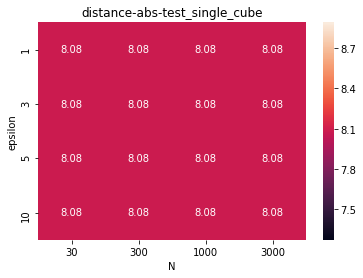

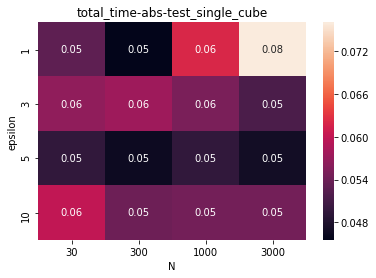

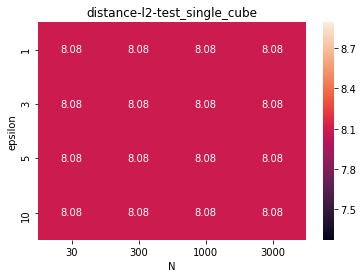

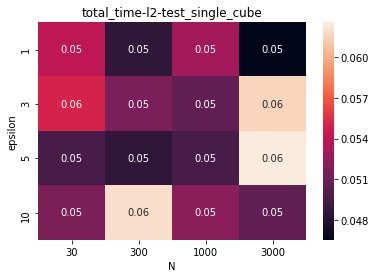

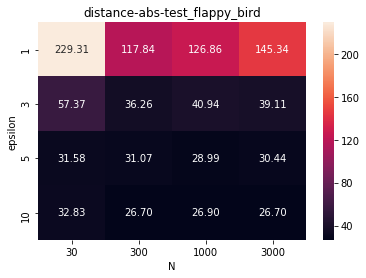

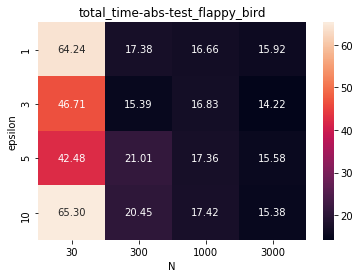

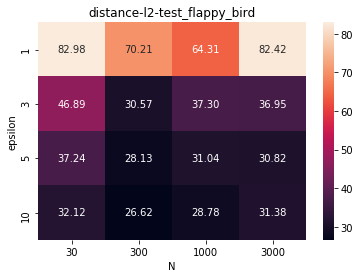

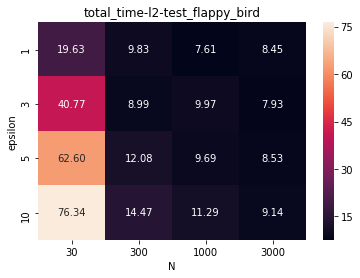

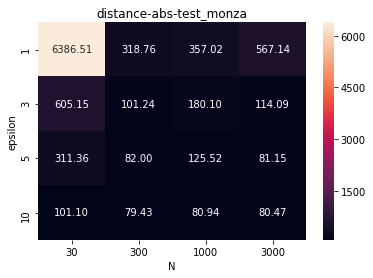

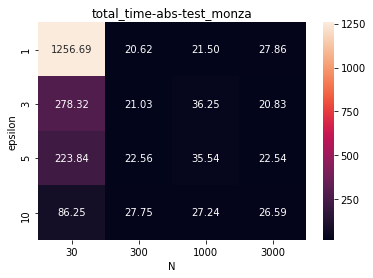

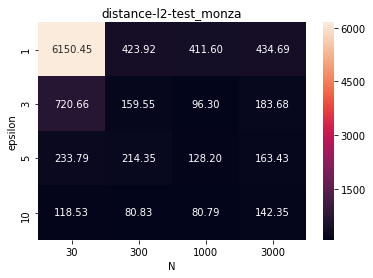

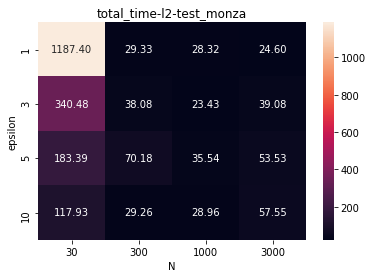

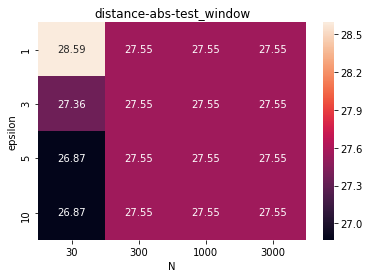

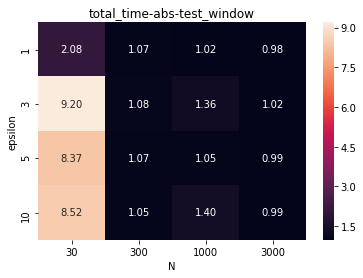

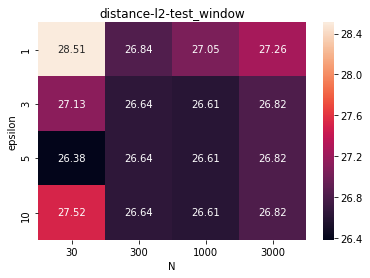

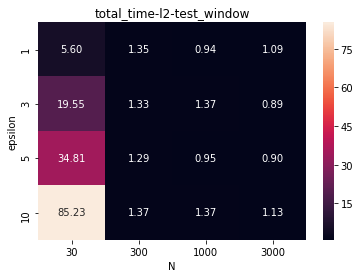

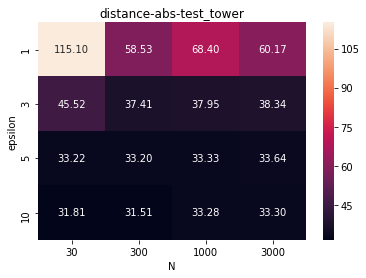

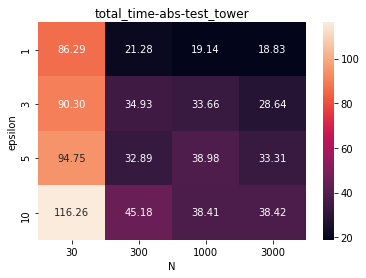

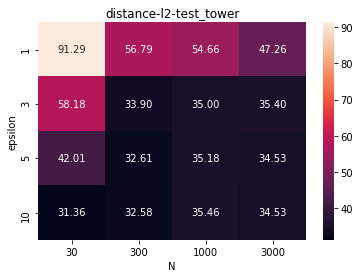

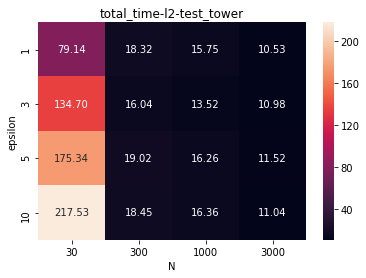

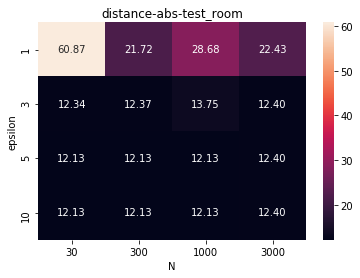

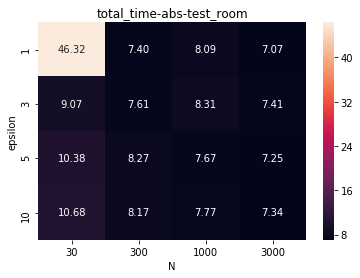

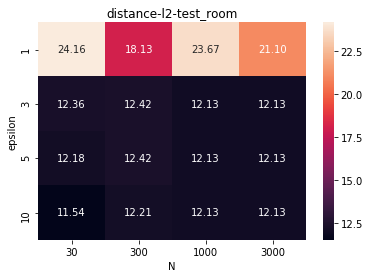

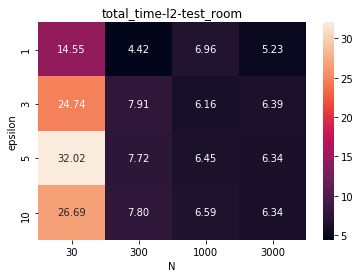

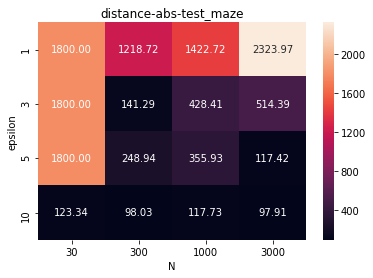

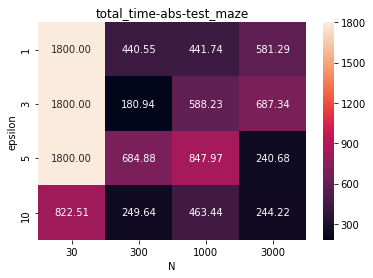

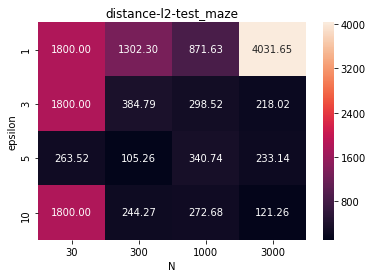

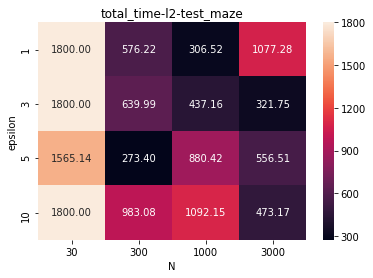

In [366]:
# mapp = 'test_flappy_bird'
# norm = 'abs'
# container = 'time'
for mapp in maps:
    for norm in ['abs','l2']:
        for container in ['distance','total_time']:
            pd_tmp = pd_RTAA[(pd_RTAA['map'] == mapp)][pd_RTAA['norm'] == norm]
            d2_data = pd_tmp[['N','eps',container]].values
            heat_data = 1800* np.ones((4,4))
            index1,index2 = {},{}
            index1[30.0],index1[300.0],index1[3000.0],index1[1000.0] = 0,1,3,2
            index2[1.],index2[3.],index2[5.],index2[10.0] = 0,1,2,3
            for i in range(d2_data.shape[0]):
                if d2_data[i][0] in index1.keys() and d2_data[i][1] in index2.keys():
                    heat_data[index1[d2_data[i][0]]][index2[d2_data[i][1]]] = d2_data[i][2]
            fig = plt.figure()
            ax = seaborn.heatmap(heat_data,annot=True,fmt='0.2f',xticklabels = [30,300,1000,3000], yticklabels = [1,3,5,10])
            ax.set_xlabel('N')
            ax.set_ylabel('epsilon')
            ax.set_title(container+'-'+norm+'-' +mapp)
            # ax.set_title('distance - l2')
            fig.savefig(container+'-'+norm+'-' +mapp+'.png')

In [341]:
d2_data

array([[1.00000000e+03, 1.00000000e+00, 3.11362819e+02],
       [1.00000000e+03, 1.00000000e+01, 8.11500858e+01],
       [1.00000000e+03, 3.00000000e+00, 8.19951423e+01],
       [1.00000000e+03, 5.00000000e+00, 1.25519123e+02],
       [1.00000000e+04, 1.00000000e+00, 7.71852067e+01],
       [1.00000000e+04, 3.00000000e+00, 7.72173322e+01],
       [3.00000000e+01, 1.00000000e+00, 6.38650983e+03],
       [3.00000000e+01, 1.00000000e+01, 5.67138994e+02],
       [3.00000000e+01, 3.00000000e+00, 3.18760111e+02],
       [3.00000000e+01, 5.00000000e+00, 3.57021519e+02],
       [3.00000000e+02, 1.00000000e+00, 6.05154680e+02],
       [3.00000000e+02, 1.00000000e+01, 1.14088037e+02],
       [3.00000000e+02, 2.00000000e+00, 1.06026539e+02],
       [3.00000000e+02, 3.00000000e+00, 1.01244357e+02],
       [3.00000000e+02, 5.00000000e+00, 1.80097947e+02],
       [3.00000000e+03, 1.00000000e+00, 1.01099712e+02],
       [3.00000000e+03, 1.00000000e+01, 8.04667898e+01],
       [3.00000000e+03, 3.00000

In [409]:
pd_vis = pd_data[pd_data['algorithm'] == 'Vis-graph'][pd_data['eps'] == 1]
pd_vis_tmp = pd_vis[['norm','map','distance','total_time']]
with open('mytable.tex', 'w') as tf:
     tf.write(pd_vis_tmp.to_latex(index = False))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [414]:
pd_vis = pd_data[pd_data['algorithm'] == 'RRT']
pd_vis_tmp = pd_vis[['pg','norm','map','distance','total_time']]
pd_vis_tmp

,pg,norm,map,distance,total_time
126,0.00,abs,test_single_cube,12.813030,0.542020
127,0.00,abs,test_flappy_bird,46.259885,1.429369
128,0.00,abs,test_window,39.387103,2.214137
129,0.00,abs,test_tower,44.950811,8.630779
130,0.00,abs,test_room,20.274526,0.276265
131,0.00,l2,test_single_cube,22.638594,9.952137
132,0.00,l2,test_flappy_bird,37.439475,2.373998
133,0.00,l2,test_window,41.025127,0.985947
134,0.00,l2,test_tower,46.781916,2.525455
135,0.00,l2,test_room,23.014722,0.255744


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


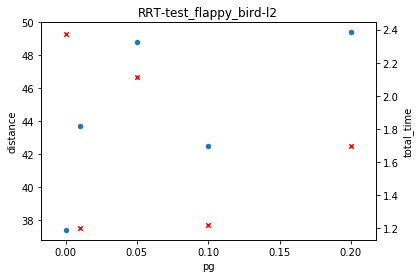

In [454]:
pd_vis_map_tmp = pd_vis_tmp[pd_vis_tmp['map'] == 'test_flappy_bird'][pd_vis_tmp['norm'] == 'l2']
ax = pd_vis_map_tmp.plot.scatter('pg','distance')
ax2 = ax.twinx()
pd_vis_map_tmp.plot.scatter('pg','total_time',ax = ax2,marker = 'x',color = 'r')
plt.title('RRT-test_flappy_bird-l2')
plt.savefig('./RRT-test_flappy_bird-l2.png')

In [18]:
pd_brrt = pd_data[pd_data['algorithm'] == 'BiRRT'][pd_data['norm'] == 'abs']
pd_brrt_tmp = pd_brrt[['RRT_connect','norm','map','distance','total_time']]
pd_brrt_tmp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,RRT_connect,norm,map,distance,total_time
0,False,abs,test_single_cube,17.290517,0.023022
1,False,abs,test_flappy_bird,44.470306,1.039997
2,False,abs,test_monza,106.254933,645.197947
3,False,abs,test_window,34.354858,0.094104
4,False,abs,test_tower,57.277880,7.586297
5,False,abs,test_room,20.141989,0.212705
6,False,abs,test_maze,142.597613,618.769343
14,True,abs,test_single_cube,26.943598,0.225216
15,True,abs,test_flappy_bird,60.927090,0.469949
16,True,abs,test_monza,99.026047,303.103604


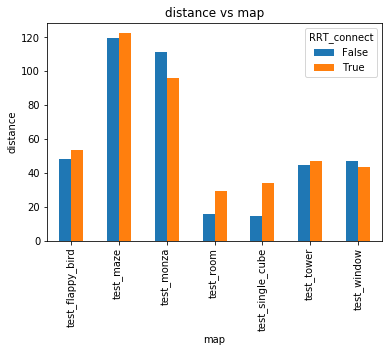

In [491]:
pd_brrt_tmp.pivot(index='map', columns='RRT_connect', values='distance').plot(kind='bar')
plt.ylabel('distance')
plt.title('distance vs map')
plt.savefig('BRRT-connect_dist.png')

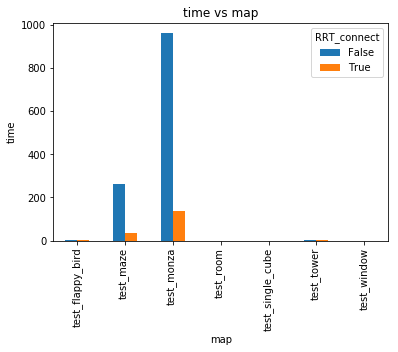

In [490]:
pd_brrt_tmp.pivot(index='map', columns='RRT_connect', values='total_time').plot(kind='bar')
plt.ylabel('time')
plt.title('time vs map')
plt.savefig('BRRT-connect_time.png')

In [540]:
pd_brrt = pd_data[pd_data['algorithm'] == 'nRRT'][pd_data['norm'] == 'l2'][pd_data['map'] == 'test_monza']
pd_brrt_tmp = pd_brrt[['reconnect','num_of_tree','norm','map','distance','total_time']]
pd_brrt_tmp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,reconnect,num_of_tree,norm,map,distance,total_time
37,False,10,l2,test_monza,144.428049,2.989146
51,False,20,l2,test_monza,98.767949,3.700000
65,True,20,l2,test_monza,7.180725,84.408610
79,False,5,l2,test_monza,92.396222,3.698850
93,False,50,l2,test_monza,106.128543,18.042935
107,False,8,l2,test_monza,93.546634,0.349121
121,True,8,l2,test_monza,27.029073,29.070805


In [541]:

a = pd_brrt_tmp.append({'reconnect':False,'num_of_tree':2,'norm':'2','map':'test_monza','distance':95.837004	,'total_time':136.985879}, ignore_index=True)
print(a)

   reconnect  num_of_tree norm         map    distance  total_time
0      False           10   l2  test_monza  144.428049    2.989146
1      False           20   l2  test_monza   98.767949    3.700000
2       True           20   l2  test_monza    7.180725   84.408610
3      False            5   l2  test_monza   92.396222    3.698850
4      False           50   l2  test_monza  106.128543   18.042935
5      False            8   l2  test_monza   93.546634    0.349121
6       True            8   l2  test_monza   27.029073   29.070805
7      False            2    2  test_monza   95.837004  136.985879


In [542]:
print(a)
a = a[a['reconnect'] == False]
print(a)

   reconnect  num_of_tree norm         map    distance  total_time
0      False           10   l2  test_monza  144.428049    2.989146
1      False           20   l2  test_monza   98.767949    3.700000
2       True           20   l2  test_monza    7.180725   84.408610
3      False            5   l2  test_monza   92.396222    3.698850
4      False           50   l2  test_monza  106.128543   18.042935
5      False            8   l2  test_monza   93.546634    0.349121
6       True            8   l2  test_monza   27.029073   29.070805
7      False            2    2  test_monza   95.837004  136.985879
   reconnect  num_of_tree norm         map    distance  total_time
0      False           10   l2  test_monza  144.428049    2.989146
1      False           20   l2  test_monza   98.767949    3.700000
3      False            5   l2  test_monza   92.396222    3.698850
4      False           50   l2  test_monza  106.128543   18.042935
5      False            8   l2  test_monza   93.546634    0.34

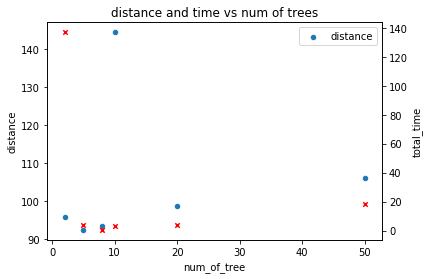

In [544]:
ax = a.plot.scatter('num_of_tree','distance')
plt.legend(['distance'])
ax2 = ax.twinx()

a.plot.scatter('num_of_tree','total_time',ax=ax2, marker = 'x', color  = 'r')
# plt.legend(['time'])
plt.title('distance and time vs num of trees')
plt.savefig('./nRRT-monza,png')

In [24]:
pd_nrrt = pd_data[pd_data['algorithm'] == 'nRRT'][pd_data['norm'] == 'abs'][pd_data['num_of_tree'] ==8]
pd_nrrt_tmp = pd_nrrt[['reconnect','num_of_tree','norm','map','distance','total_time']]
print(pd_nrrt_tmp)
pd_nrrt_tmp.pivot(index='map', columns='reconnect', values='distance').plot(kind='bar')
plt.ylabel('distance')
plt.title('distance vs map')
plt.savefig('nRRT-reconnect_distance.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


     reconnect  num_of_tree norm               map    distance  total_time
98       False            8  abs  test_single_cube   86.878301    0.535012
99       False            8  abs  test_flappy_bird   64.953075    1.441883
100      False            8  abs        test_monza  100.846195   43.665070
101      False            8  abs       test_window   68.789425    0.569059
102      False            8  abs        test_tower  143.777009    5.636911
103      False            8  abs         test_room   35.305458    0.308296
104      False            8  abs         test_maze  149.838887   19.292690
112       True            8  abs  test_single_cube    8.286083   81.975369
113       True            8  abs  test_flappy_bird   43.416902    3.687432
114       True            8  abs        test_monza   85.860526   21.911462
115       True            8  abs       test_window   33.394604    4.662534
116       True            8  abs        test_tower   60.126243   15.106234
117       True           